<a href="https://colab.research.google.com/github/chw8207/ADP-study/blob/master/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### KNeighborsClassifer

In [ ]:
import pandas as pd

liver = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/adp실기/ADP-study/data/indian_liver_patient.csv')
print(liver.Dataset.unique())
print(liver.head())

[1 2]
   Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65  Female              0.7               0.1                   187   
1   62    Male             10.9               5.5                   699   
2   62    Male              7.3               4.1                   490   
3   58    Male              1.0               0.4                   182   
4   72    Male              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Dataset  
0      3.3                        0.90    

In [ ]:
# 성별 변수를 원핫인코딩하기
import numpy as np

liver.Gender = np.where(liver.Gender=='Female',0,1)
print(liver.head())

   Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65       0              0.7               0.1                   187   
1   62       1             10.9               5.5                   699   
2   62       1              7.3               4.1                   490   
3   58       1              1.0               0.4                   182   
4   72       1              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Dataset  
0      3.3                        0.90        1 

In [ ]:
# 데이터 결측치존재여부 확인
print(liver.isna().sum())

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64


In [ ]:
# 결측치가 4개로 충분히 작으므로 제거하기
liver.dropna(axis=0, inplace=True)
print(liver.isna().sum())

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64


In [ ]:
# 설명변수 타겟변수 설정
# 7:3비율로 데이터 분할
from sklearn.model_selection import train_test_split

X = liver[liver.columns.difference(['Dataset'])]
y = liver['Dataset']

train_X, test_X, train_y, test_y = train_test_split(X,y, stratify=y,
                                                    test_size=0.3, random_state=1)

print(train_X.shape, test_X.shape, train_y.shape, test_y.shape)

(405, 10) (174, 10) (405,) (174,)


In [ ]:
# KNN분류기 생성
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5, weights='uniform')
clf.fit(train_X, train_y)

KNeighborsClassifier()

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score,\
precision_score, recall_score, f1_score

# 예측값 생성
pred = clf.predict(test_X)

# 평가하기
test_cm = confusion_matrix(test_y, pred)
test_acc = accuracy_score(test_y, pred)
test_prc = precision_score(test_y, pred)
test_rcll = recall_score(test_y, pred)
test_f1 = f1_score(test_y, pred)

print(test_cm)
print('\n')
print(f'정확도\t{round(test_acc*100,2)}')
print(f'정밀도\t{round(test_prc*100,2)}')
print(f'재현율\t{round(test_rcll*100,2)}')

[[98 26]
 [30 20]]


정확도	67.82
정밀도	76.56
재현율	79.03


### KNeighborsRegressor

In [1]:
import numpy as np

# 임의의 샘플데이터 생성하기
np.random.seed(0)
X = np.sort(5*np.random.rand(400,1), axis=0)
T = np.linspace(0,5,500)[:,np.newaxis]
y = np.sin(X).ravel()

print(X[:10])
print(T[:10])
print(y[:10])

[[0.02347738]
 [0.05713729]
 [0.05857042]
 [0.06618429]
 [0.08164251]
 [0.08214815]
 [0.09260897]
 [0.093949  ]
 [0.09596599]
 [0.10053773]]
[[0.        ]
 [0.01002004]
 [0.02004008]
 [0.03006012]
 [0.04008016]
 [0.0501002 ]
 [0.06012024]
 [0.07014028]
 [0.08016032]
 [0.09018036]]
[0.02347522 0.05710621 0.05853694 0.06613598 0.08155185 0.08205579
 0.09247665 0.09381086 0.09581876 0.10036845]


In [2]:
# 타깃데이터에 노이즈 추가하기
y[::1] += 1 * (0.5-np.random.rand(400))

In [3]:
# 데이터 분할하기
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, 
                                                    random_state=1)

print(train_X.shape, test_X.shape, train_y.shape, test_y.shape)

(280, 1) (120, 1) (280,) (120,)


In [4]:
# 모델 학습시키기
from sklearn.neighbors import KNeighborsRegressor

knn_uni = KNeighborsRegressor(n_neighbors=20, weights='uniform')
knn_dis = KNeighborsRegressor(n_neighbors=20, weights='distance')

knn_uni.fit(train_X, train_y)
knn_dis.fit(train_X, train_y)

KNeighborsRegressor(n_neighbors=20, weights='distance')

In [8]:
# 예측값 생성
uni_pred = knn_uni.predict(test_X)
dis_pred = knn_dis.predict(test_X)

# 모델 평가
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd
import numpy as np

preds = [uni_pred, dis_pred]
weights = ['uniform', 'distance']
evls = ['mse', 'rmse', 'mae']

results = pd.DataFrame(index=weights, columns=evls)

for pred, nm in zip(preds, weights) : 
  mse = mean_squared_error(test_y, pred)
  mae = mean_absolute_error(test_y, pred)
  rmse = np.sqrt(mse)

  results.loc[nm]['mse'] = round(mse,2)
  results.loc[nm]['rmse'] = round(rmse,2)
  results.loc[nm]['mae'] = round(mae,2)

results

,mse,rmse,mae
uniform,0.1,0.31,0.27
distance,0.11,0.34,0.28


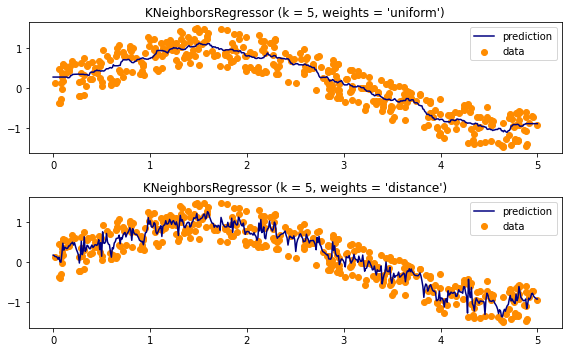

In [30]:
# 시각화하기
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

for i, weights in enumerate(['uniform','distance']) : 
  knn = KNeighborsRegressor(n_neighbors=20, weights=weights)

  y_ = knn.fit(X,y).predict(T)

  plt.subplot(2,1,i+1)
  plt.scatter(X,y,color='darkorange', label='data')
  plt.plot(T,y_,color='navy', label='prediction')
  plt.axis('tight')
  plt.legend()
  plt.title("KNeighborsRegressor (k = %i, weights = '%s')"%(5, weights))

plt.tight_layout()
plt.show()